### 1. Importing all the essential libraries

In [1]:
import string
import re
import codecs
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import feature_extraction
from sklearn import linear_model
from sklearn.naive_bayes import MultinomialNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn import pipeline
from sklearn.model_selection import train_test_split
from sklearn import metrics
import itertools

### 2. Loading the data

In [2]:
df = pd.read_csv("Language Detection.csv")

In [3]:
df.head()

,Text,Language
0,"Nature, in the broadest sense, is the natural...",English
1,"""Nature"" can refer to the phenomena of the phy...",English
2,"The study of nature is a large, if not the onl...",English
3,"Although humans are part of nature, human acti...",English
4,[1] The word nature is borrowed from the Old F...,English


In [4]:
df.tail()

,Text,Language
10332,ನಿಮ್ಮ ತಪ್ಪು ಏನು ಬಂದಿದೆಯೆಂದರೆ ಆ ದಿನದಿಂದ ನಿಮಗೆ ಒ...,Kannada
10333,ನಾರ್ಸಿಸಾ ತಾನು ಮೊದಲಿಗೆ ಹೆಣಗಾಡುತ್ತಿದ್ದ ಮಾರ್ಗಗಳನ್...,Kannada
10334,ಹೇಗೆ ' ನಾರ್ಸಿಸಿಸಮ್ ಈಗ ಮರಿಯನ್ ಅವರಿಗೆ ಸಂಭವಿಸಿದ ಎ...,Kannada
10335,ಅವಳು ಈಗ ಹೆಚ್ಚು ಚಿನ್ನದ ಬ್ರೆಡ್ ಬಯಸುವುದಿಲ್ಲ ಎಂದು ...,Kannada
10336,ಟೆರ್ರಿ ನೀವು ನಿಜವಾಗಿಯೂ ಆ ದೇವದೂತನಂತೆ ಸ್ವಲ್ಪ ಕಾಣು...,Kannada


### 3. Data Preprocessing

In [5]:
def remove(Text):
  for pun in string.punctuation:
    Text = Text.replace(pun,"")
  Text = Text.lower()
  return(Text)

In [6]:
df['Text'] = df['Text'].apply(remove)

In [7]:
df.head()


,Text,Language
0,nature in the broadest sense is the natural p...,English
1,nature can refer to the phenomena of the physi...,English
2,the study of nature is a large if not the only...,English
3,although humans are part of nature human activ...,English
4,1 the word nature is borrowed from the old fre...,English


In [8]:
df['Language'].value_counts()

Language
English       1385
French        1014
Spanish        819
Portugeese     739
Italian        698
Russian        692
Sweedish       676
Malayalam      594
Dutch          546
Arabic         536
Turkish        474
German         470
Tamil          469
Danish         428
Kannada        369
Greek          365
Hindi           63
Name: count, dtype: int64

C:\Users\HI\AppData\Local\Temp\ipykernel_12104\4278121595.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x = df['Language'], data=df,
C:\Users\HI\AppData\Local\Temp\ipykernel_12104\4278121595.py:2: UserWarning: 
The palette list has fewer values (13) than needed (17) and will cycle, which may produce an uninterpretable plot.
  sns.countplot(x = df['Language'], data=df,


<Axes: xlabel='Language', ylabel='count'>

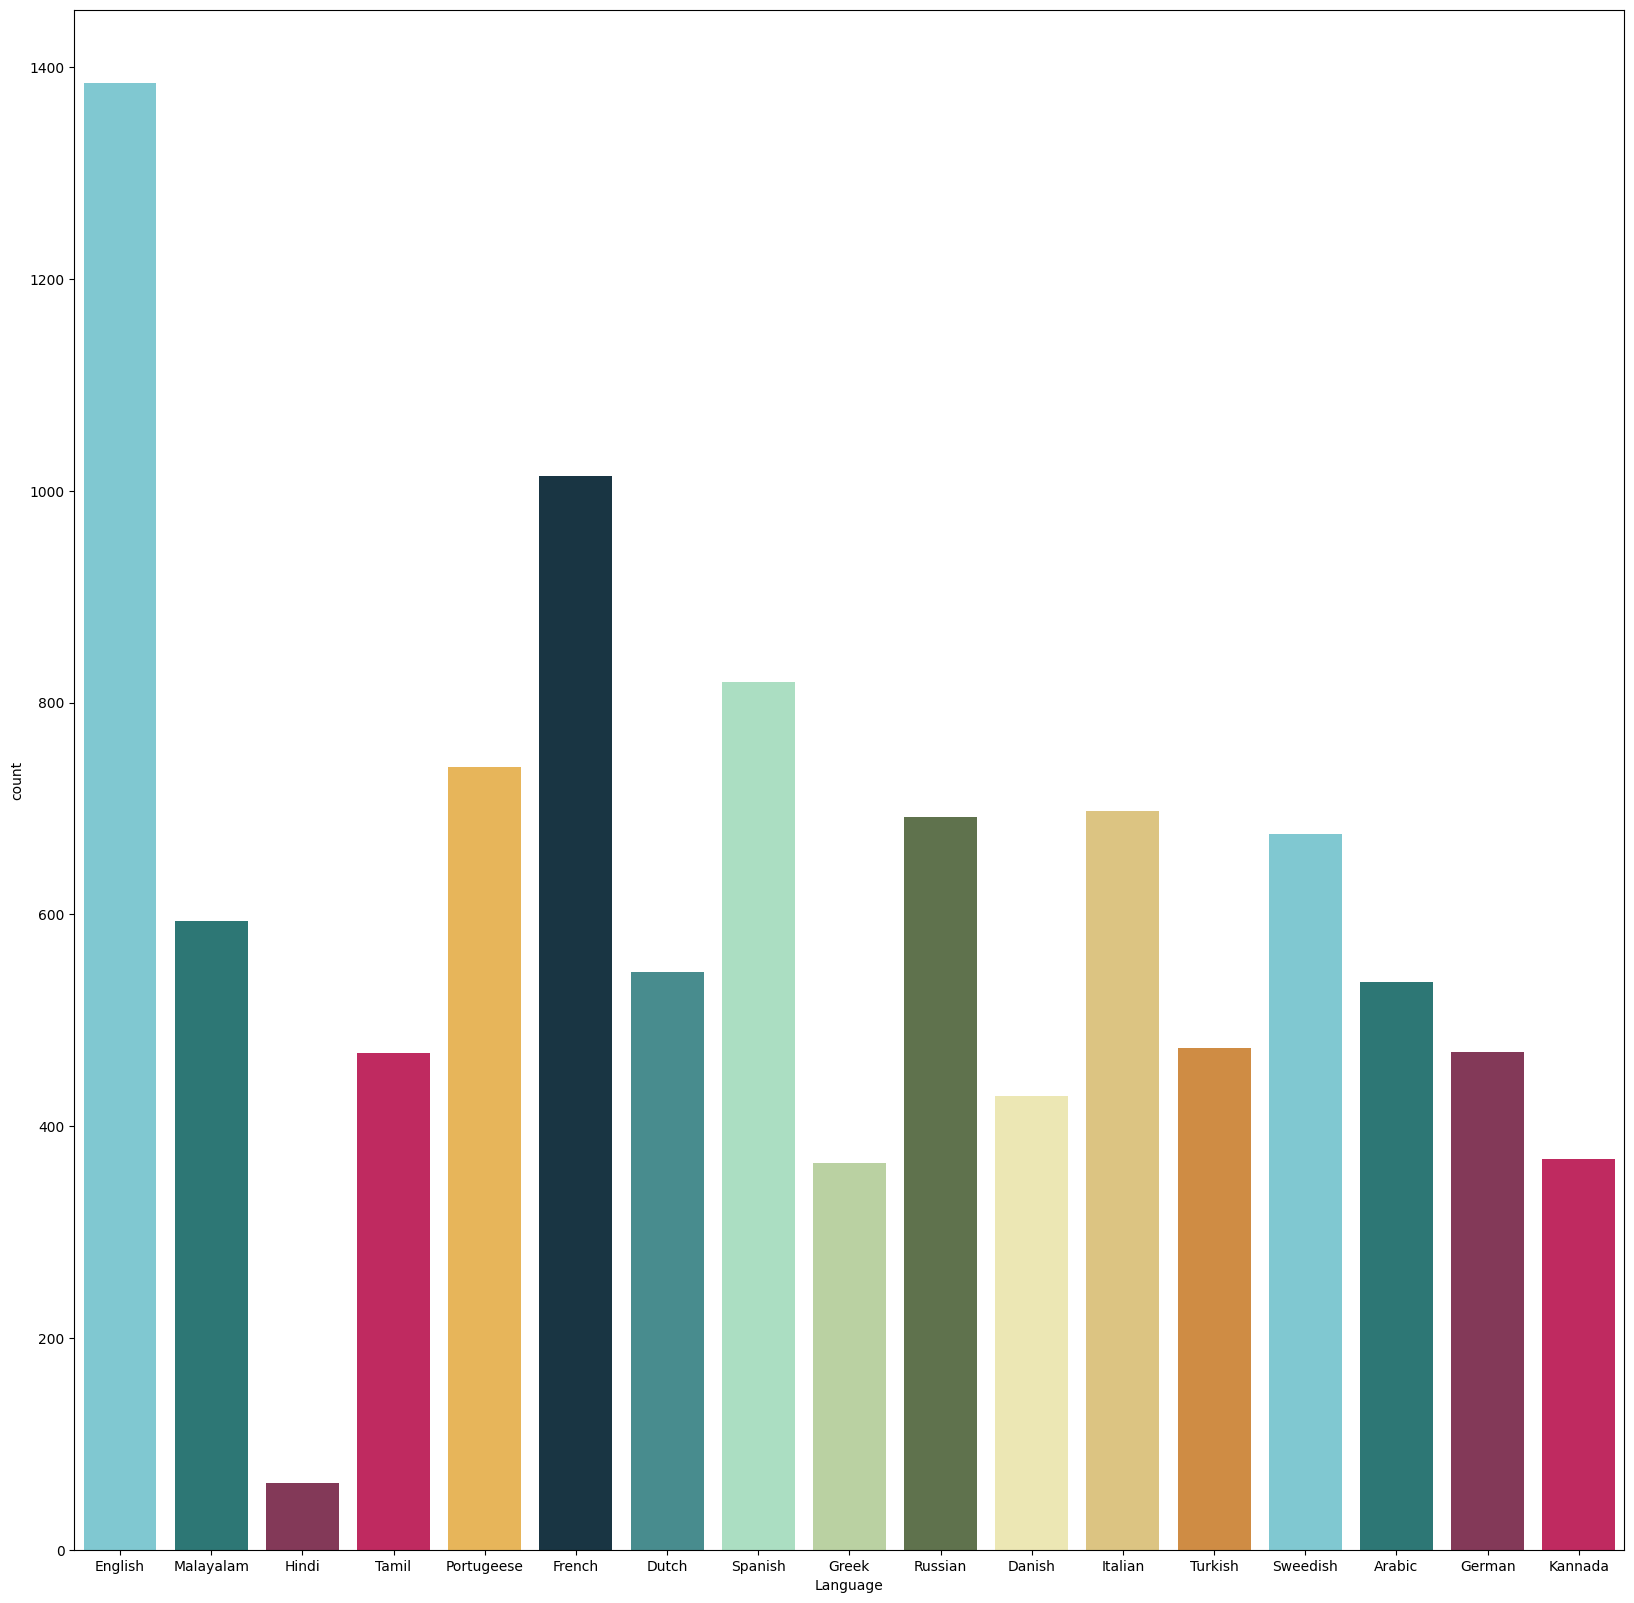

In [9]:
plt.figure(figsize=(20,20))
sns.countplot(x = df['Language'], data=df,
 palette=['#73d2de','#218380','#8f2d56','#d81159','#ffbc42','#12374a', '#3c979a', '#a3e6c1', '#bad99a', '#5f7847', '#f5efab', '#ebcb73', '#e68d2d'])

### 5. Splitting the dataset

* Splitting the dataset into Independent and Dependent variables

In [10]:
x = df.iloc[:,0]
y = df.iloc[:,1]

In [11]:
x.head()

0     nature in the broadest sense is the natural p...
1    nature can refer to the phenomena of the physi...
2    the study of nature is a large if not the only...
3    although humans are part of nature human activ...
4    1 the word nature is borrowed from the old fre...
Name: Text, dtype: object

In [12]:
y.head()

0    English
1    English
2    English
3    English
4    English
Name: Language, dtype: object

In [13]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [14]:
x_train.head()

5967    τώρα αργότερα η μέλι και ο τέρι έσπασαν αντίο ...
3570                            améliorezle ou discutezen
7607    non ne vale la pena personalmente amo la frase...
3080    tente copiar minha pronúncia exatamente inclui...
828     if the complexity of the model is increased in...
Name: Text, dtype: object

In [15]:
x_test.head()

6662    и с этими словами она села в его карету и даже...
7362    sistemi di tipo probabilistico erano invasi di...
765     machine learning involves computers discoverin...
6192    несколько языковых версий опубликовали подборк...
562     225 in may 2014 wikimedia foundation named lil...
Name: Text, dtype: object

In [16]:
y_train.head()

5967         Greek
3570        French
7607       Italian
3080    Portugeese
828        English
Name: Language, dtype: object

In [17]:
y_test.head()

6662    Russian
7362    Italian
765     English
6192    Russian
562     English
Name: Language, dtype: object

## Applying TF-IDF Vectorizer

In [18]:
vectorizer = feature_extraction.text.TfidfVectorizer(ngram_range=(1,3), analyzer='char')

In [19]:
pipe_mnb = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('clf', MultinomialNB())
])

In [20]:
pipe_mnb.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('clf', MultinomialNB())])

In [21]:
pipe_lr = pipeline.Pipeline([
    ('vectorizer', vectorizer),
    ('lr_clf', LogisticRegression())
])

In [22]:
pipe_lr.fit(x_train, y_train)

Pipeline(steps=[('vectorizer',
                 TfidfVectorizer(analyzer='char', ngram_range=(1, 3))),
                ('lr_clf', LogisticRegression())])

## Model Prediction for Logistic Regression

In [23]:
lr_predicted = pipe_lr.predict(x_test)

## Model evaluation for Logistic Regression

In [24]:
lr_acc = (metrics.accuracy_score(y_test, lr_predicted))*100
print('The logistic regression has:',lr_acc,'% accuracy')

The logistic regression has: 98.30754352030948 % accuracy


## Model Prediction for MultinomialNB

In [25]:
mnb_predicted = pipe_mnb.predict(x_test)

## Model Evaluation for MultinomialNB

In [26]:
mnb_acc = (metrics.accuracy_score(y_test, mnb_predicted))*100
print('The MultinomialNB has :',mnb_acc,'% accuracy')

The MultinomialNB has : 84.7678916827853 % accuracy


## Evaluation matrix for Logistic Regression

In [27]:
matrix = metrics.confusion_matrix(y_test, lr_predicted)
print('Confusion matrix: \n', matrix)

Confusion matrix: 
 [[105   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   1]
 [  0  71   0   0   0   0   0   0   0   0   0   0   0   0   2   0   0]
 [  0   0 108   3   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   1 290   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   2 214   0   0   0   1   0   0   0   0   0   0   0   2]
 [  0   0   1   1   0  89   0   0   0   0   0   0   0   0   1   0   1]
 [  0   0   0   0   0   0  68   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0  10   0   0   0   0   0   0   0   0   0]
 [  0   1   0   1   0   0   0   0 140   0   0   1   0   1   0   0   1]
 [  0   0   0   0   0   0   0   0   0  66   0   0   0   0   0   0   0]
 [  0   0   0   1   0   0   0   0   0   0 120   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0 141   0   1   0   0   1]
 [  0   0   0   0   0   0   0   0   0   0   0   0 136   0   0   0   0]
 [  0   0   0   0   0   0   0   0   1   0   0   2   1 156

In [28]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Actual labels',
                          cmap=plt.cm.Blues):

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [29]:
plt.figure(figsize=(20,20))
plot_confusion_matrix(matrix, classes = ['English','Malayalam','Hindi','Tamil','Portugeese','French','Dutch','Spanish','Greek Language','Russian','Danish','Italian','Turkish','Sweedish','Arabic','German','Kannada'])

Confusion matrix, without normalization


In [ ]:
pipe_lr.predict(["मेरा नाम अभिषेक हे"])

array(['Hindi'], dtype=object)

In [ ]:
import pickle

In [ ]:
pickle.dump(pipe_lr, open('model.pkl','wb'))